In [1]:
#void insertion sort(lst)
def insertion_sort(arr):
    N = len(arr)
    for i in range(1, N):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

#void selection sort(lst)
def selection_sort(array):
    size = len(array)
    for ind in range(size):
        min_index = ind

        for j in range(ind + 1, size):
            if array[j] < array[min_index]:
                min_index = j
        (array[ind], array[min_index]) = (array[min_index], array[ind])
    return array

In [2]:
#Testing
lst = [5,2,4,7,9]
print(insertion_sort(lst))
print(selection_sort(lst))

lst2 = [6,8,9,3,23,2,4545,34,43,100,32,43,5555]
print(insertion_sort(lst2))
print(selection_sort(lst2))

def test_sort(sort_fn):
    test_cases = [
        [],                    
        [1],                  
        [1, 2, 3, 4, 5],      
        [5, 4, 3, 2, 1],       
        [3, 1, 2, 3, 1],     
        [6, 8, 9, 3, 23, 2, 4545, 34, 43, 100, 32, 43, 5555]  
    ]

    for case in test_cases:
        lst = list(case)      
        sort_fn(lst)
        assert lst == sorted(case), f"Failed on {case}"

# Run tests
test_sort(insertion_sort)
test_sort(selection_sort)

print("All tests passed!")


[2, 4, 5, 7, 9]
[2, 4, 5, 7, 9]
[2, 3, 6, 8, 9, 23, 32, 34, 43, 43, 100, 4545, 5555]
[2, 3, 6, 8, 9, 23, 32, 34, 43, 43, 100, 4545, 5555]
All tests passed!


In [3]:
import time
def benchmark(algorithm, lst):
    arr = list(lst)
    t0 = time.perf_counter()
    out = algorithm(arr)
    if out is not None: _ = out
    return time.perf_counter() - t0

In [4]:
#Bechnmark
print(benchmark(insertion_sort, lst))
print(benchmark(selection_sort, lst))

print(benchmark(insertion_sort, lst2))
print(benchmark(selection_sort, lst2))

1.0699965059757233e-05
1.3400102034211159e-05
1.0400079190731049e-05
2.610008232295513e-05


In [5]:
import random

def best_case(n):
    return list(range(n))

def average_case(n):
    lst = list(range(n))
    random.shuffle(lst)
    return lst

def worst_case(n):
    return list(range(n, 0, -1))

In [6]:
list_sizes = [1000, 2000, 5000, 10000, 20000]

ins_best, ins_avg, ins_worst = [], [], []
sel_best, sel_avg, sel_worst = [], [], []

for n in list_sizes:
    b = best_case(n)
    a = average_case(n)
    w = worst_case(n)

    ins_best.append(benchmark(insertion_sort, b))
    ins_avg.append(benchmark(insertion_sort, a))
    ins_worst.append(benchmark(insertion_sort, w))

    sel_best.append(benchmark(selection_sort, b))
    sel_avg.append(benchmark(selection_sort, a))
    sel_worst.append(benchmark(selection_sort, w))

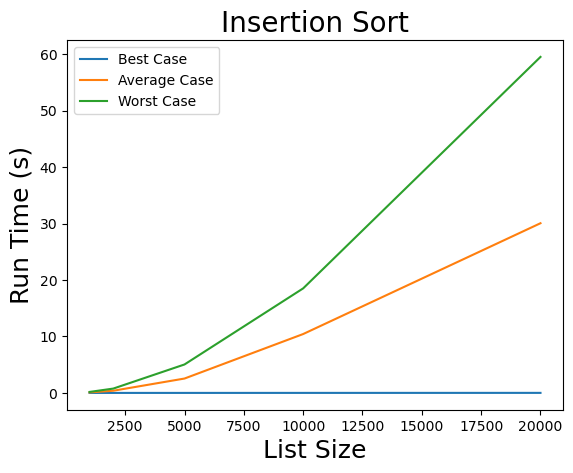

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list_sizes, ins_best, label="Best Case")
plt.plot(list_sizes, ins_avg, label="Average Case")
plt.plot(list_sizes, ins_worst, label="Worst Case")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Insertion Sort", fontsize=20)
plt.legend()
plt.show()

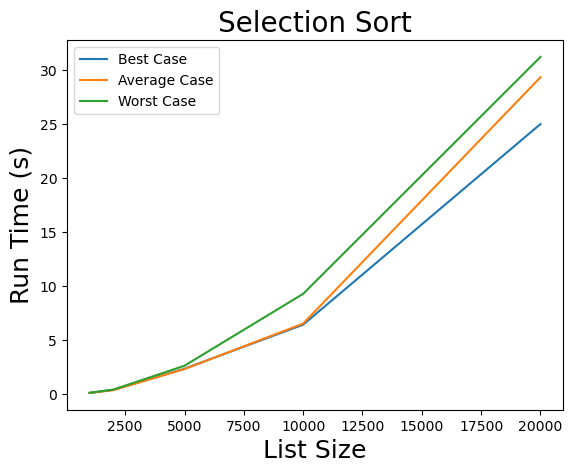

In [8]:
plt.figure()
plt.plot(list_sizes, sel_best, label="Best Case")
plt.plot(list_sizes, sel_avg, label="Average Case")
plt.plot(list_sizes, sel_worst, label="Worst Case")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Selection Sort", fontsize=20)
plt.legend()
plt.show()

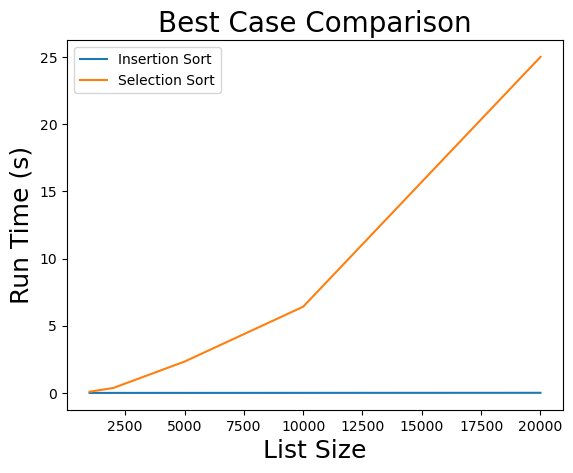

In [9]:
plt.figure()
plt.plot(list_sizes, ins_best, label="Insertion Sort")
plt.plot(list_sizes, sel_best, label="Selection Sort")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Best Case Comparison", fontsize=20)
plt.legend()
plt.show()

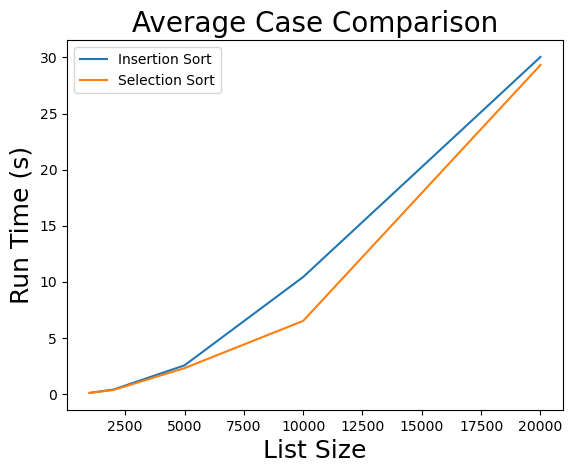

In [10]:
plt.figure()
plt.plot(list_sizes, ins_avg, label="Insertion Sort")
plt.plot(list_sizes, sel_avg, label="Selection Sort")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Average Case Comparison", fontsize=20)
plt.legend()
plt.show()

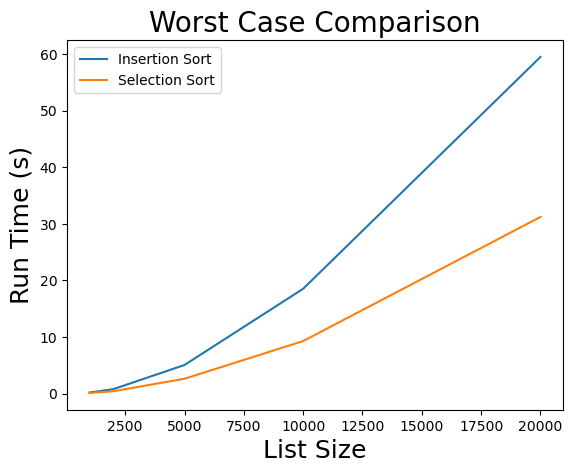

In [11]:
plt.figure()
plt.plot(list_sizes, ins_worst, label="Insertion Sort")
plt.plot(list_sizes, sel_worst, label="Selection Sort")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Worst Case Comparison", fontsize=20)
plt.legend()
plt.show()

## Theoretical vs. Estimated Run Times

For both insertion sort and selection sort, we consider the standard three input cases:

- **Best case:** already sorted list  
- **Average case:** randomly ordered list  
- **Worst case:** reverse-sorted list  

---

## Theoretical Run-Time Complexities

| Algorithm        | Case     | Theoretical Runtime |
|------------------|----------|---------------------|
| Insertion Sort   | Best     | O(n)                |
| Insertion Sort   | Average  | O(n²)               |
| Insertion Sort   | Worst    | O(n²)               |
| Selection Sort   | Best     | O(n²)               |
| Selection Sort   | Average  | O(n²)               |
| Selection Sort   | Worst    | O(n²)               |

---

## Estimated Run-Time Growth (From Benchmarks)

Based on the benchmark results, the following trends were observed:

- **Insertion Sort**
  - Best-case performance grows approximately linearly with input size.
  - Average- and worst-case performance grow super-linearly and are consistent with quadratic behavior.

- **Selection Sort**
  - All three cases exhibit nearly identical growth rates.
  - Input order has little effect on run time, consistent with Θ(n²) behavior.

Because the input sizes used in these benchmarks are relatively small, the measured run times are affected by Python interpreter overhead and timing noise. Nevertheless, the overall growth trends align with the theoretical analysis.

---

## Do the Estimates Match the Theory?

**Yes, qualitatively.**

- Insertion sort behaves close to **O(n)** in the best case and **O(n²)** in the average and worst cases.
- Selection sort behaves as **O(n²)** in all cases.
- The similarity between the average- and worst-case curves for selection sort matches theoretical expectations.

Minor discrepancies are expected due to:
- Limited input sizes  
- Microsecond-level timing noise  
- Overhead from the Python runtime  

---

## Which Algorithm Was Faster, and Why?

Insertion sort was consistently faster than selection sort, especially in the best and average cases.

### Explanation (Inner Loop Behavior)

**Insertion Sort**
- The inner loop terminates early when elements are already in the correct position.
- Performs fewer comparisons and shifts for sorted or nearly sorted data.

**Selection Sort**
- Always scans the entire unsorted portion of the list to find the minimum element.
- Performs the same number of comparisons regardless of input order.

As a result, insertion sort benefits significantly from favorable input order, while selection sort does not.

---

## Which Algorithm Would We Use in Practice?

Based on both theoretical analysis and benchmark results, **insertion sort** would be preferred in practice for small or partially sorted datasets.

Reasons:
- Adaptive to input order  
- Faster in real-world scenarios where data is often nearly sorted  
- Simple implementation with low constant factors  
- Commonly used as a subroutine in optimized sorting algorithms
